In [1]:
import inspect
import re
from collections import Counter, defaultdict

import pandas as pd

In [5]:
df = pd.read_csv("filtered_token_breakdown.csv")
df

,script_path,script_tokens,.to_numpy(,.read_parquet(,.unstack(,.from_frame(,.array(,.to_pydatetime(,.get_dummies(,.andrews_curves(,...,.kurt(,.is_boolean(,.date_range(,.nunique(,.as_unordered(,.equal_levels(,.searchsorted(,.to_json(,.normalize(,.idxmax(
0,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 2, 'pd': 2, '.read_csv(': 1, '.head...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 3, 'pd': 1, '.append(': 2, '.min(':...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 2, 'pd': 4, '.stack(': 3, '.unstack...",0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 2, 'pd': 13, '.read_csv(': 2, '.inf...",0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 1, 'pd': 4, '.join(': 1, '.iloc[': ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237262,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 1, 'pd': 10, '.read_csv(': 2, '.hea...",0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
237263,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 1, 'pd': 5, '.mean(': 3}",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237264,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 1, '.fillna(': 1}",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237265,../../pandas-api-analysis-private/data/big_dat...,"{'pd': 2, 'pandas': 1, '.append(': 2}",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



## Count and Coverage Analysis

### Declare count and coverage DataFrames.

In [6]:
counts = pd.DataFrame(df.iloc[:, 2:].sum().reset_index())
counts.columns = ["method_name", "count"]

In [7]:
coverage = pd.DataFrame((~(df.iloc[:, 2:] == 0)).sum().reset_index())
coverage.columns = ["method_name", "coverage"]
coverage["coverage"] = coverage["coverage"] / len(df)

In [8]:
counts.nlargest(25, "count")

,method_name,count
234,.append(,429290
204,.head(,334326
325,.read_csv(,294494
203,.loc[,244266
34,.iloc[,135234
87,.drop(,133214
327,.groupby(,130897
64,.mean(,116908
244,.ix[,110651
208,.sum(,89339


In [9]:
counts.nsmallest(25, "count")

,method_name,count
9,.infer_objects(,0
15,.to_xml(,0
16,.get_slice_bound(,0
18,.rdivmod(,0
20,.set_ordered(,0
30,.get_loc_level(,0
32,.is_dtype_equal(,0
38,.read_orc(,0
65,.read_xml(,0
67,.is_interval(,0


In [10]:
coverage.nlargest(25, "coverage")

,method_name,coverage
325,.read_csv(,0.608091
204,.head(,0.475060
234,.append(,0.381507
87,.drop(,0.202047
203,.loc[,0.185386
64,.mean(,0.183574
327,.groupby(,0.180320
138,.to_csv(,0.169800
34,.iloc[,0.139366
208,.sum(,0.137765


In [11]:
coverage.nsmallest(25, "coverage")

,method_name,coverage
9,.infer_objects(,0.0
15,.to_xml(,0.0
16,.get_slice_bound(,0.0
18,.rdivmod(,0.0
20,.set_ordered(,0.0
30,.get_loc_level(,0.0
32,.is_dtype_equal(,0.0
38,.read_orc(,0.0
65,.read_xml(,0.0
67,.is_interval(,0.0


In [13]:
coverage.to_csv("coverage.csv")

In [9]:
middle_core_length = len(counts[counts["count"] > 2])
print(
    "If we take out functions that have not been used by more than two notebooks,"
    + f" we are left with a very large middle core of {middle_core_length} functions."
)

If we take out functions that have not been used by more than two notebooks, we are left with a very large middle core of 250 functions.


In [10]:
counts[counts["count"] > 2].nsmallest(15, "count")

,method_name,count
13,.rmul(,3
20,.andrews_curves(,3
170,.lag_plot(,3
264,.from_frame(,3
289,.radd(,3
17,.read_feather(,4
104,.truediv(,4
208,.is_mixed(,4
3,.to_native_types(,5
227,.rsub(,5


### Visualize the count and coverage as histograms.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce5e396850>],
      dtype=object)

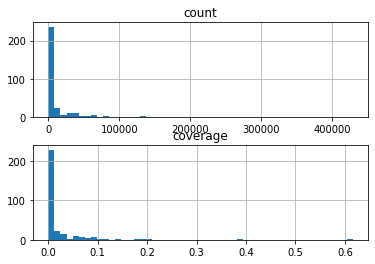

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1)
counts.hist(bins=50, ax=axes[0])
coverage.hist(bins=50, ax=axes[1])

### Breakdown of coverage percentage

In [12]:
coverage["bins"] = pd.cut(
    coverage.coverage,
    bins=(0, 0.01, 0.05, 0.1, 0.65),
    labels=["0-1%", "1-5%", "5-10%", "10-65%"],
    right=False,
)

In [13]:
coverage["bins"].value_counts()

0-1%      225
1-5%       42
5-10%      25
10-65%     14
Name: bins, dtype: int64

### Number of functions in a notebook

In [14]:
num_func = df.iloc[:, 2:-1].sum(axis=1)
num_func.mean()

16.04968519901825

In [15]:
num_func.median()

10.0

In [16]:
num_func.max()

1602

## Cumulative Distribution based on Rank

The idea behind computing cumulative coverage is that we want to find the _least_ common function for each script. If we know the least common function for each script, then we know at what point our cumulative coverage will cover that script entirely.

The algorithm is:
1. Sort the columns by descreasing coverage (most to least common).
2. For each row, find the rank (rank 1 = most common) of the least common function, which is the `least_common_rank`.
3. Group by and count the `least_common_ranks` of all columns. This gives us a mapping of `least_common_rank` to `count`. When sorted by rank, the mapping of `least_common_rank` to `count` tells us, for each function __x__ (if iterating in increasing rank) how many __additional__ scripts are covered by __x__.
4. With the mapping sorted by rank, we compute the cumulative sum, which gives us a mapping of `least_common_rank` to `cumulative_count` where `cumulative_count` is now the number of scripts that are covered by `least_common_rank` functions or __less__. As a sanity check, the `cumulative_count` of the least common function should be equal to the total number of scripts.
5. With the cumulative sum mapping, we can divide each `count` by the total number of scripts to get a cumulative percentage.

In [17]:
# (1) Get the top functions, sorted.
ordered_top_funcs = list(
    coverage.sort_values("coverage", ascending=False)["method_name"]
)
print(len(ordered_top_funcs))

top_funcs_df = df[ordered_top_funcs]
top_funcs_df

306


,.read_csv(,.append(,.drop(,.loc[,.mean(,.groupby(,.iloc[,.sum(,.concat(,.apply(,...,.get_loc_level(,.boxplot_frame(,.to_perioddelta(,.divmod(,.hist_series(,.month_name(,.asof_locs(,.slice_locs(,.read_orc(,.is_dtype_equal(
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,5,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234270,2,4,10,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234271,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234273,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
"""
Helper that returns the rank of the least common function
that is in a row/script. This rank corresponds to the rank
where the entire script's functions are covered.
"""


def least_common_function_rank(row):
    for i, val in reversed(list(enumerate(row))):
        if val != 0:
            return int(i + 1)

In [19]:
# (2) For each row, find the rank (rank 1 = most common) of the least common function, which is the least_common_rank.
least_common_ranks = top_funcs_df.apply(
    lambda row: least_common_function_rank(row), axis=1
)
least_common_ranks

0           1
1          54
2          85
3         100
4          20
         ... 
234270     60
234271      5
234272     22
234273      2
234274     94
Length: 234275, dtype: int64

In [20]:
"""
(3) Group by and count the least_common_ranks of all columns. This gives us a mapping of
least_common_rank to count. When sorted by rank, the mapping of least_common_rank to
count tells us, for each function x (if iterating in increasing rank) how many 
additional scripts are covered by x.

NOTE: This does not have to be monotonically increasing.
Imagine the function rank is: 1. read_csv 2. plot 3. mean 4. to_csv and there are
only two types of users, ones who use read_csv and plot, and ones who use read_csv,
mean, to_csv. read_csv is the most common function, used in all scripts. However, its
least_common_ranks_count would be 0, since everyone who uses read_csv also uses
another less common function.
"""
least_common_ranks_count = least_common_ranks.groupby(least_common_ranks).count()
least_common_ranks_count

1      8630
2      6199
3      2548
4      1179
5      1229
       ... 
257       1
258       1
259       1
260       1
261       1
Length: 261, dtype: int64

In [21]:
"""
(4) With the mapping sorted by rank, we compute the cumulative sum, which gives 
us a mapping of least_common_rank to cumulative_count where cumulative_count is
now the number of scripts that are covered by least_common_rank functions or 
less. As a sanity check, the cumulative_count of the least common function
should be equal to the total number of scripts.
"""

least_common_ranks_cumulative_count = (
    least_common_ranks_count.cumsum()
)  # Get the cumulative sum of the series.
print(least_common_ranks_cumulative_count.iloc[-1])
assert (
    least_common_ranks_cumulative_count.iloc[-1] == df.shape[0]
), "The cumulative sum of the least common function should be equal to the number of rows."
least_common_ranks_cumulative_count

234275


1        8630
2       14829
3       17377
4       18556
5       19785
        ...  
257    234271
258    234272
259    234273
260    234274
261    234275
Length: 261, dtype: int64

In [22]:
"""
(5) With the cumulative sum mapping, we can divide each count
by the total number of scripts to get a cumulative percentage.
"""

coverage_rank_cumulative_perc = least_common_ranks_cumulative_count / df.shape[0] * 100
coverage_rank_cumulative_perc

1        3.683705
2        6.329741
3        7.417351
4        7.920606
5        8.445203
          ...    
257     99.998293
258     99.998719
259     99.999146
260     99.999573
261    100.000000
Length: 261, dtype: float64

In [23]:
k = 3
pct = coverage_rank_cumulative_perc.iloc[k]
print(f"Top k func: {pct:.2f}%, {int(pct*df.shape[0]/100)} notebooks")

Top k func: 7.92%, 18555 notebooks


In [24]:
k = 50
pct = coverage_rank_cumulative_perc.iloc[k]
print(f"Top k func: {pct:.2f}%, {int(pct*df.shape[0]/100)} notebooks")

Top k func: 50.51%, 118341 notebooks


In [25]:
k = 179
pct = coverage_rank_cumulative_perc.iloc[k]
print(f"Top k func: {pct:.2f}%, {int(pct*df.shape[0]/100)} notebooks")

Top k func: 99.04%, 232026 notebooks


(0.0, 105.0)

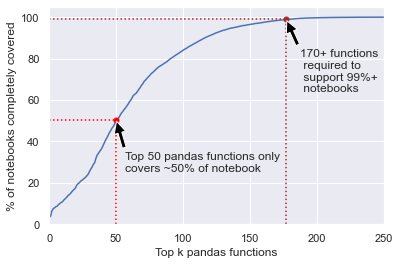

In [26]:
import seaborn as sns

sns.set_theme()
coverage_rank_cumulative_perc.plot()

y_pt = coverage_rank_cumulative_perc.iloc[50]

plt.xlabel("Top k pandas functions")
plt.ylabel("% of notebooks completely covered")
plt.annotate(
    f"Top 50 pandas functions only \ncovers ~{int(y_pt)}% of notebook",
    xy=(50, y_pt),
    xycoords="data",
    xytext=(57, y_pt - 25),
    textcoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
)

plt.hlines(y_pt, xmin=0, xmax=50, linestyle="dotted", color="red")
plt.vlines(50, ymin=0, ymax=y_pt, linestyle="dotted", color="red")
plt.plot(50, y_pt, marker=".", markersize=10, color="red")

y_pt = 99
x_pt = 177
plt.hlines(y_pt, xmin=0, xmax=x_pt, linestyle="dotted", color="brown")
plt.vlines(x_pt, ymin=0, ymax=y_pt, linestyle="dotted", color="brown")
plt.plot(x_pt, y_pt, marker=".", markersize=10, color="brown")
plt.annotate(
    f"170+ functions\n required to\n support 99%+\n notebooks",
    xy=(x_pt, y_pt),
    xycoords="data",
    xytext=(x_pt + 10, y_pt - 35),
    textcoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
)


plt.xlim(0, 250)
plt.ylim(0, 105)